In [ ]:
!pip install Tashaphyne


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 16.9 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tashaphyne.stemming import ArabicLightStemmer


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Function to load data from folders
def load_data_from_folders(main_folder_path):
    data = []
    for category_folder in os.listdir(main_folder_path):
        category_label = category_folder
        category_path = os.path.join(main_folder_path, category_folder)
        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                data.append({'text': content, 'category': category_label})
    return pd.DataFrame(data)



In [ ]:
!unzip -u "/content/article-dataset.zip" -d "/content/Dataset"



Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset/السياسة/1000.txt  
  inflating: /content/Dataset/السياسة/1001.txt  
  inflating: /content/Dataset/السياسة/1002.txt  
  inflating: /content/Dataset/السياسة/1003.txt  
  inflating: /content/Dataset/السياسة/1004.txt  
  inflating: /content/Dataset/السياسة/1005.txt  
  inflating: /content/Dataset/السياسة/1006.txt  
  inflating: /content/Dataset/السياسة/1007.txt  
  inflating: /content/Dataset/السياسة/1008.txt  
  inflating: /content/Dataset/السياسة/1009.txt  
  inflating: /content/Dataset/السياسة/1010.txt  
  inflating: /content/Dataset/السياسة/1011.txt  
  inflating: /content/Dataset/السياسة/1012.txt  
  inflating: /content/Dataset/السياسة/1013.txt  
  inflating: /content/Dataset/السياسة/1014.txt  
  inflating: /content/Dataset/السياسة/1015.txt  
  inflating: /content/Dataset/السياسة/1016.txt  
  inflating: /content/Dataset/السياسة/1017.txt  
  inflating: /content/Dataset/السياسة/1018.txt  
  inflating: /cont

In [ ]:

# Load data from folders|
Data = load_data_from_folders('/content/Dataset')


In [ ]:
Data.head(5)

,text,category
0,دبي: «الخليج» بحثت مؤسسة دبي لخدمات الإسعاف، س...,الطب
1,أبوظبي: مريم عدنان كشفت مدينة الشيخ خليفة الطب...,الطب
2,دبي «الخليج»: بحثت هيئة الصحة بدبي مع وفد يمثل...,الطب
3,تهتم مدينة الشيخ خليفة الطبية - بإدارة كليفلان...,الطب
4,أبوظبي: مريم عدنان حذر أطباء في أبوظبي من الاس...,الطب


## Rule Based System

In [ ]:


rules = {
    'الثقافة': ['فن', 'أدب', 'سينما', 'موسيقى', 'تاريخ', 'فنان', 'معرض', 'تصوير', 'رواية', 'مسرح', 'معمار', 'تصميم', 'معرض فني', 'فيلم', 'معرض أعمال','ثقافة'],

    'التمويل': ['اقتصاد', 'مالية', 'بنك', 'استثمار', 'أسهم', 'تجارة', 'أعمال', 'سوق', 'تأمين', 'عملة', 'بورصة', 'مصرفية', 'مستثمر', 'أرباح', 'رأس المال','تمويل'],

    'الطب': ['طب', 'صحة', 'مستشفى', 'دواء', 'علاج', 'جراحة', 'أطباء', 'مرض', 'تشخيص', 'صحة نفسية', 'صيدلية', 'وبائيات', 'عناية صحية', 'أبحاث طبية', 'علاج طبيعي','طب أسنان'],

    'السياسة': ['سياسة', 'حكومة', 'انتخابات', 'برلمان', 'رئيس', 'سياسي', 'دبلوماسية', 'قانون', 'دستور', 'حرب', 'ديمقراطية', 'حقوق', 'سفارة', 'سياسة خارجية', 'مؤتمر','الملك'],

    'الدين': ['دين', 'إسلام', 'المسجد', 'الشيخ', 'يهودية', 'مسيحية', 'صلاة', 'قرآن', 'كتاب مقدس', 'زكاة', 'صوم', 'حج', 'مذهب', 'عقيدة', 'الله','النبي'],

    'الرياضة': ['كرة قدم', 'سلة', 'تنس', 'سباحة', 'جمباز', 'حكم', 'ملاكمة', 'كرة طائرة', 'هدف', 'كرة يد', 'جولف', 'مباراة', 'كرة القاعدة', 'بطولة ', 'فريق ','دوري'],

    'التقنية': ['تقنية', 'برمجة', 'هواتف ذكية', 'شبكات اجتماعية', 'ابتكار', 'ذكاء اصطناعي', 'تطوير تطبيقات', 'تكنولوجيا المعلومات',
                   'حوسبة سحابية', 'إنترنت الأشياء', 'تجارة إلكترونية', 'تصميم واجهة مستخدم', 'تقنية الواقع الافتراضي', 'شبكات الحاسوب', 'تقنية البلوكتشين','كمبيوتر']
}


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time
start_time = time.time()  # Start measuring time

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('arabic'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Stemming
    ArListem=ArabicLightStemmer()
    Stemmed_tokens=[ArListem.light_stem(token) for token in filtered_tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(Stemmed_tokens)

    return preprocessed_text

# Apply the rules to classify the text
def classify_text(text):
    preprocessed_text = preprocess_text(text)

    for category, keywords in rules.items():
        for keyword in keywords:
            if keyword in preprocessed_text:
                return category

    return 'unknown'

# Apply classification to the articles
Data['predicted_category_RB'] = Data['text'].apply(classify_text)
end_time = time.time()  # Stop measuring time
classification_time = end_time - start_time
print("Classification Time:", classification_time, "seconds")

Classification Time: 341.86380672454834 seconds


In [ ]:
Data.head(4500)

,text,category,predicted_category_RB
0,دبي: «الخليج» بحثت مؤسسة دبي لخدمات الإسعاف، س...,الطب,الطب
1,أبوظبي: مريم عدنان كشفت مدينة الشيخ خليفة الطب...,الطب,الثقافة
2,دبي «الخليج»: بحثت هيئة الصحة بدبي مع وفد يمثل...,الطب,الطب
3,تهتم مدينة الشيخ خليفة الطبية - بإدارة كليفلان...,الطب,الطب
4,أبوظبي: مريم عدنان حذر أطباء في أبوظبي من الاس...,الطب,الطب
...,...,...,...
4495,دبي: «الخليج» وافقت الجمعية العمومية لشركة «شع...,التمويل,الثقافة
4496,غلبت الإيجابية والإغلاقات الخضراء على مؤشرات أ...,التمويل,التمويل
4497,أعلنت شعاع كابيتال عن نتائجها المالية للربع ال...,التمويل,التمويل
4498,تراجع مؤشر الصقر الصادر عن المال كابيتال أمس 8...,التمويل,التمويل


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(Data['category'], Data['predicted_category_RB'])
accuracy_percent_RB = accuracy * 100
print(f'The Accuracy: {accuracy_percent_RB:.2f}%')

# Calculate precision
precision = precision_score(Data['category'], Data['predicted_category_RB'], average='weighted')
precision_percent_RB = precision * 100
print(f'Precision: {precision_percent_RB:.2f}%')

# Calculate recall
recall = recall_score(Data['category'], Data['predicted_category_RB'], average='weighted')
recall_percent_RB = recall * 100
print(f'Recall: {recall_percent_RB:.2f}%')

# Calculate F1-score
f1 = f1_score(Data['category'], Data['predicted_category_RB'], average='weighted')
f1_percent_RB = f1 * 100
print(f'F1-score: {f1_percent_RB:.2f}%')


The Accuracy: 40.62%
Precision: 56.01%
Recall: 40.62%
F1-score: 35.63%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Machine Learning Based System (Naive Bayes)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


X = Data['text']
y = Data['category']

X_train, X_test, y_train, y_test =  train_test_split(X, y,random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X)

model = MultinomialNB()  # Initialize the Naive Bayes model
start_time = time.time()  # Start measuring time
model.fit(X_train_vec, y_train)  # Train the model
end_time = time.time()  # Stop measuring time


In [ ]:
y_pred = model.predict(X_test_vec)
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

Training Time: 0.1152644157409668 seconds


In [ ]:
Data['predicted_category_NB'] = y_pred
Data.head(4500)

,text,category,predicted_category_RB,predicted_category_NB
0,دبي: «الخليج» بحثت مؤسسة دبي لخدمات الإسعاف، س...,الطب,الطب,الطب
1,أبوظبي: مريم عدنان كشفت مدينة الشيخ خليفة الطب...,الطب,الثقافة,الطب
2,دبي «الخليج»: بحثت هيئة الصحة بدبي مع وفد يمثل...,الطب,الطب,الطب
3,تهتم مدينة الشيخ خليفة الطبية - بإدارة كليفلان...,الطب,الطب,الطب
4,أبوظبي: مريم عدنان حذر أطباء في أبوظبي من الاس...,الطب,الطب,الطب
...,...,...,...,...
4495,دبي: «الخليج» وافقت الجمعية العمومية لشركة «شع...,التمويل,الثقافة,التمويل
4496,غلبت الإيجابية والإغلاقات الخضراء على مؤشرات أ...,التمويل,التمويل,التمويل
4497,أعلنت شعاع كابيتال عن نتائجها المالية للربع ال...,التمويل,التمويل,التمويل
4498,تراجع مؤشر الصقر الصادر عن المال كابيتال أمس 8...,التمويل,التمويل,التمويل


In [ ]:
accuracy = accuracy_score(y, y_pred)
accuracy_percent_NB = accuracy * 100
print(f'The Accuracy: {accuracy_percent_NB:.2f}%')

# Calculate precision
precision = precision_score(y, y_pred, average='weighted')
precision_percent_NB = precision * 100
print(f'Precision: {precision_percent_NB:.2f}%')

# Calculate recall
recall = recall_score(y, y_pred, average='weighted')
recall_percent_NB = recall * 100
print(f'Recall: {recall_percent_NB:.2f}%')

# Calculate F1-score
f1 = f1_score(y, y_pred, average='weighted')
f1_percent_NB = f1 * 100
print(f'F1-score: {f1_percent_NB:.2f}%')

The Accuracy: 96.96%
Precision: 97.05%
Recall: 96.96%
F1-score: 96.96%


## Comparison between knowledge Based (rule-based system) and Machine Learning Based (Naive Bayes)

In [ ]:
Data.head(4500)

,text,category,predicted_category_RB,predicted_category_NB
0,دبي: «الخليج» بحثت مؤسسة دبي لخدمات الإسعاف، س...,الطب,الطب,الطب
1,أبوظبي: مريم عدنان كشفت مدينة الشيخ خليفة الطب...,الطب,الثقافة,الطب
2,دبي «الخليج»: بحثت هيئة الصحة بدبي مع وفد يمثل...,الطب,الطب,الطب
3,تهتم مدينة الشيخ خليفة الطبية - بإدارة كليفلان...,الطب,الطب,الطب
4,أبوظبي: مريم عدنان حذر أطباء في أبوظبي من الاس...,الطب,الطب,الطب
...,...,...,...,...
4495,دبي: «الخليج» وافقت الجمعية العمومية لشركة «شع...,التمويل,الثقافة,التمويل
4496,غلبت الإيجابية والإغلاقات الخضراء على مؤشرات أ...,التمويل,التمويل,التمويل
4497,أعلنت شعاع كابيتال عن نتائجها المالية للربع ال...,التمويل,التمويل,التمويل
4498,تراجع مؤشر الصقر الصادر عن المال كابيتال أمس 8...,التمويل,التمويل,التمويل


In [ ]:
metrics_dict = {
    'Model': ['Rule Based system', 'Naive Bayes'],
    'Accuracy': [accuracy_percent_RB, accuracy_percent_NB],
    'Precision': [precision_percent_RB, precision_percent_NB],
    'Recall': [recall_percent_RB, recall_percent_NB],
    'F1-Score': [f1_percent_RB, f1_percent_NB]
}

metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)

               Model   Accuracy  Precision     Recall   F1-Score
0  Rule Based system  40.619048  56.005846  40.619048  35.632735
1        Naive Bayes  96.957143  97.047835  96.957143  96.955795


In [ ]:
time_dict = {
    'Model': ['Rule Based system', 'Naive Bayes'],
    'Training time (in seconds)': [classification_time, training_time]
}
time_df = pd.DataFrame(time_dict)
print(time_df)

               Model  Training time (in seconds)
0  Rule Based system                  341.863807
1        Naive Bayes                    0.115264


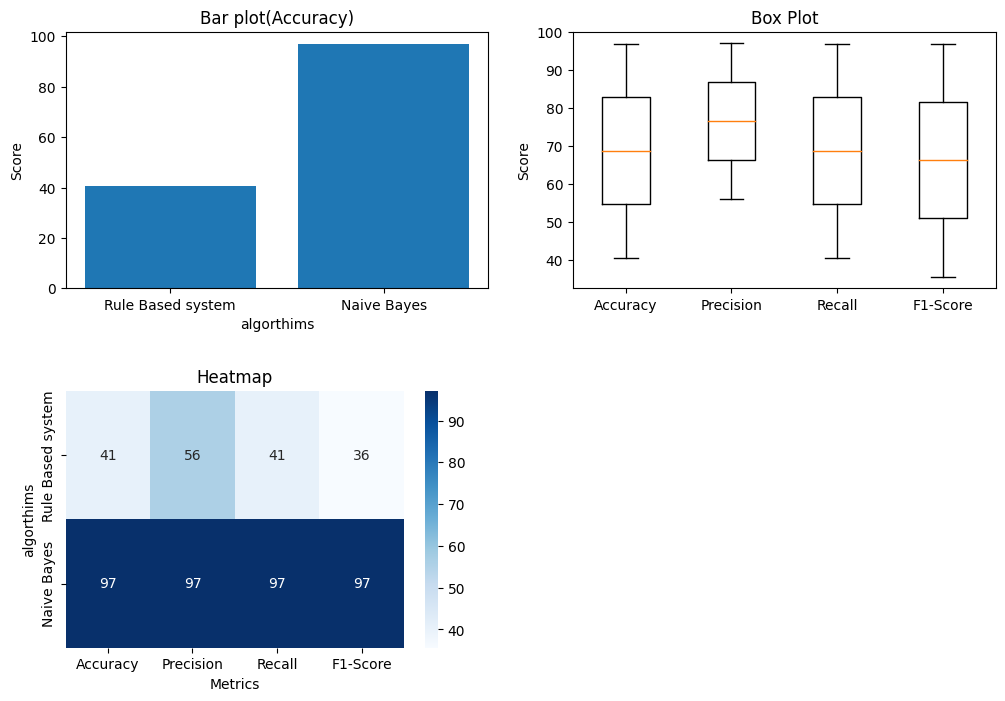

In [ ]:


# Set index
metrics_df.set_index('Model', inplace=True)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the bar chart
axes[0, 0].bar(metrics_df.index, metrics_df['Accuracy'])
axes[0, 0].set_title('Bar plot(Accuracy)')
axes[0, 0].set_xlabel('algorthims')
axes[0, 0].set_ylabel('Score')

# Plot the box plot
axes[0, 1].boxplot(metrics_df.values)
axes[0, 1].set_title('Box Plot')
axes[0, 1].set_xticklabels(metrics_df.columns)
axes[0, 1].set_ylabel('Score')

# Plot the heatmap
sns.heatmap(metrics_df, annot=True, cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Heatmap')
axes[1, 0].set_xlabel('Metrics')
axes[1, 0].set_ylabel('algorthims')

# Remove the empty subplot
fig.delaxes(axes[1, 1])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plots
plt.show()


In [ ]:
pip install --upgrade arabic-reshaper


In [ ]:
pip install python-bidi

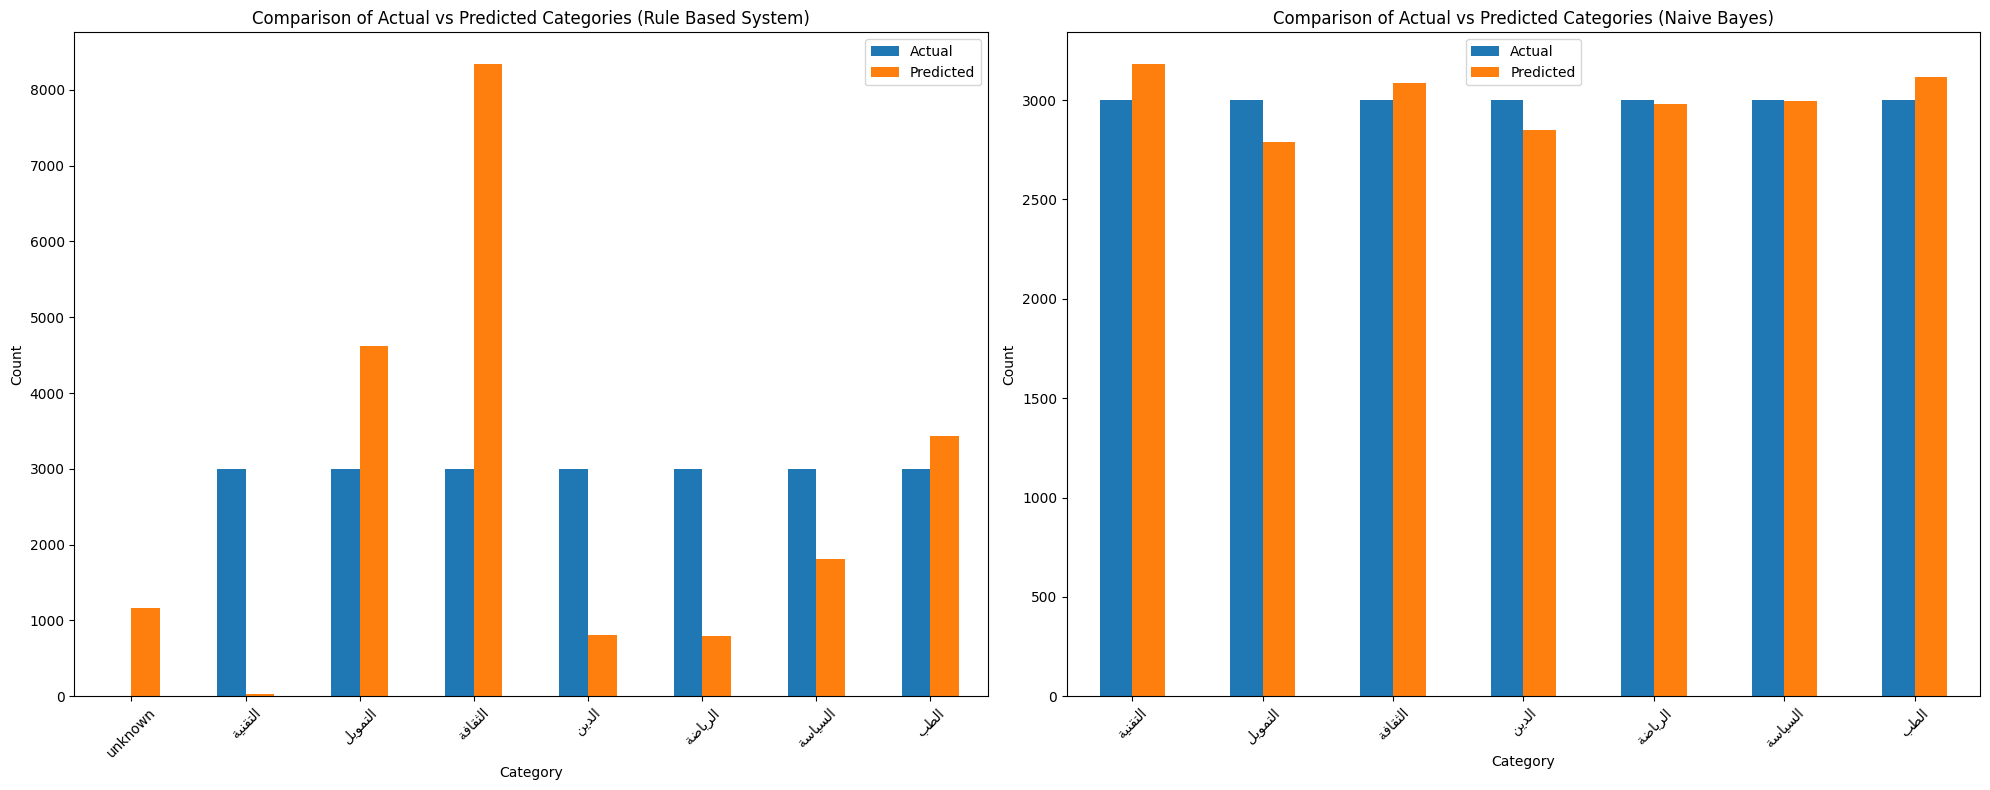

In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plotting for Rule Based System
actual_counts = Data['category'].value_counts()
predicted_counts = Data['predicted_category_RB'].value_counts()
comparison_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})

comparison_df.index = comparison_df.index.map(lambda x: arabic_reshaper.reshape(x))
comparison_df.index = comparison_df.index.map(lambda x: get_display(x))

comparison_df.plot(kind='bar', rot=45, ax=axs[0])
axs[0].set_title(arabic_reshaper.reshape('Comparison of Actual vs Predicted Categories (Rule Based System)'))
axs[0].set_xlabel(arabic_reshaper.reshape('Category'))
axs[0].set_ylabel(arabic_reshaper.reshape('Count'))

# Plotting for Naive Bayes
actual_counts = Data['category'].value_counts()
predicted_counts = Data['predicted_category_NB'].value_counts()
comparison_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})

comparison_df.index = comparison_df.index.map(lambda x: arabic_reshaper.reshape(x))
comparison_df.index = comparison_df.index.map(lambda x: get_display(x))

comparison_df.plot(kind='bar', rot=45, ax=axs[1])
axs[1].set_title(arabic_reshaper.reshape('Comparison of Actual vs Predicted Categories (Naive Bayes)'))
axs[1].set_xlabel(arabic_reshaper.reshape('Category'))
axs[1].set_ylabel(arabic_reshaper.reshape('Count'))

plt.tight_layout()
plt.show()
